In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [53]:
pd.options.display.max_rows = 200

In [25]:
def bleach(string):
    temp = ""
    string = str(string)
    if 'M' in string:
        for i in string:
            if i in ["1","2","3","4","5","6","7","8","9","0", "."]:
                temp += i
        if len(temp) > 0:
            return float(temp) * 1000000
    else:
        for i in string:
            if i in ["1","2","3","4","5","6","7","8","9","0", "."]:
                temp += i
        if len(temp) > 0:
            return float(temp)
        

In [29]:
beers = pd.read_csv('data/master_untappd_data.csv')

In [30]:
beers.shape

(18612, 16)

In [31]:
beers.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'abv', 'beer_id', 'brewery', 'brewery_id',
       'date_added', 'description', 'ibu', 'monthly_checkins', 'name',
       'raters', 'rating', 'style', 'total_checkins', 'unique_checkins'],
      dtype='object')

In [32]:
beers_redux = beers[['name', 'brewery', 'style', 'rating', 'raters', 'abv', 'ibu', 
                     'total_checkins', 'unique_checkins', 'monthly_checkins', 
                     'date_added', 'description', 'beer_id', 'brewery_id']].copy()

In [33]:
beers_redux.head()

,name,brewery,style,rating,raters,abv,ibu,total_checkins,unique_checkins,monthly_checkins,date_added,description,beer_id,brewery_id
0,Hocus Pocus,Magic Hat Brewing Company,Pale Wheat Ale - American,(3.23),"\n 10,365 Ratings ...",\n 4.5% ABV ...,\n 13 IBU ...,"14,835","12,168",99,\n Added 08/21/10 ...,Our take on a cla...,1,812
1,Grimbergen Blonde,Brouwerij Alken-Maes,Blonde Ale - Belgian Blonde / Golden,(3.51),"\n 61,846 Ratings ...",\n 6.7% ABV ...,\n 22 IBU ...,"92,563","68,879","2,144",\n Added 08/21/10 ...,When the first re...,2,264
2,Widdershins Oak Aged Barleywine Ale,Left Hand Brewing Company,Barleywine - English,(3.69),"\n 4,735 Ratings ...",\n 10.7% ABV ...,\n 65 IBU ...,"5,859","5,444",7,\n Added 11/15/13 ...,Widdershins is ou...,505601,779
3,Lucifer,Brouwerij Het Anker,Belgian Strong Golden Ale,(3.6),"\n 28,866 Ratings ...",\n 8% ABV ...,\n 24 IBU ...,"36,667","32,498",551,\n Added 12/24/10 ...,Lucifer entered t...,16551,284
4,Oxfordshire Bitter,Ridgeway Brewing,English Bitter,(3.29),\n 547 Ratings ...,\n 4% ABV ...,\n No IBU ...,704,645,6,\n Added 08/21/10 ...,,5,1056


In [34]:
beers_redux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18612 entries, 0 to 18611
Data columns (total 14 columns):
name                18612 non-null object
brewery             18612 non-null object
style               17921 non-null object
rating              15401 non-null object
raters              18612 non-null object
abv                 18612 non-null object
ibu                 18612 non-null object
total_checkins      18612 non-null object
unique_checkins     18612 non-null object
monthly_checkins    18612 non-null object
date_added          18612 non-null object
description         18612 non-null object
beer_id             18612 non-null int64
brewery_id          18612 non-null int64
dtypes: int64(2), object(12)
memory usage: 2.0+ MB


Though only two columns show missing data, several of the columns have strings in place of missing data

## Duplicates

Some of the urls from the scraper redirected back to the same beer. As such, there are a significant number of duplicates.

In [36]:
dupes = beers_redux[beers_redux.duplicated()]
dupes.shape

(2459, 14)

In [37]:
beers_redux = beers_redux.drop_duplicates()

In [38]:
beers_redux.shape

(16153, 14)

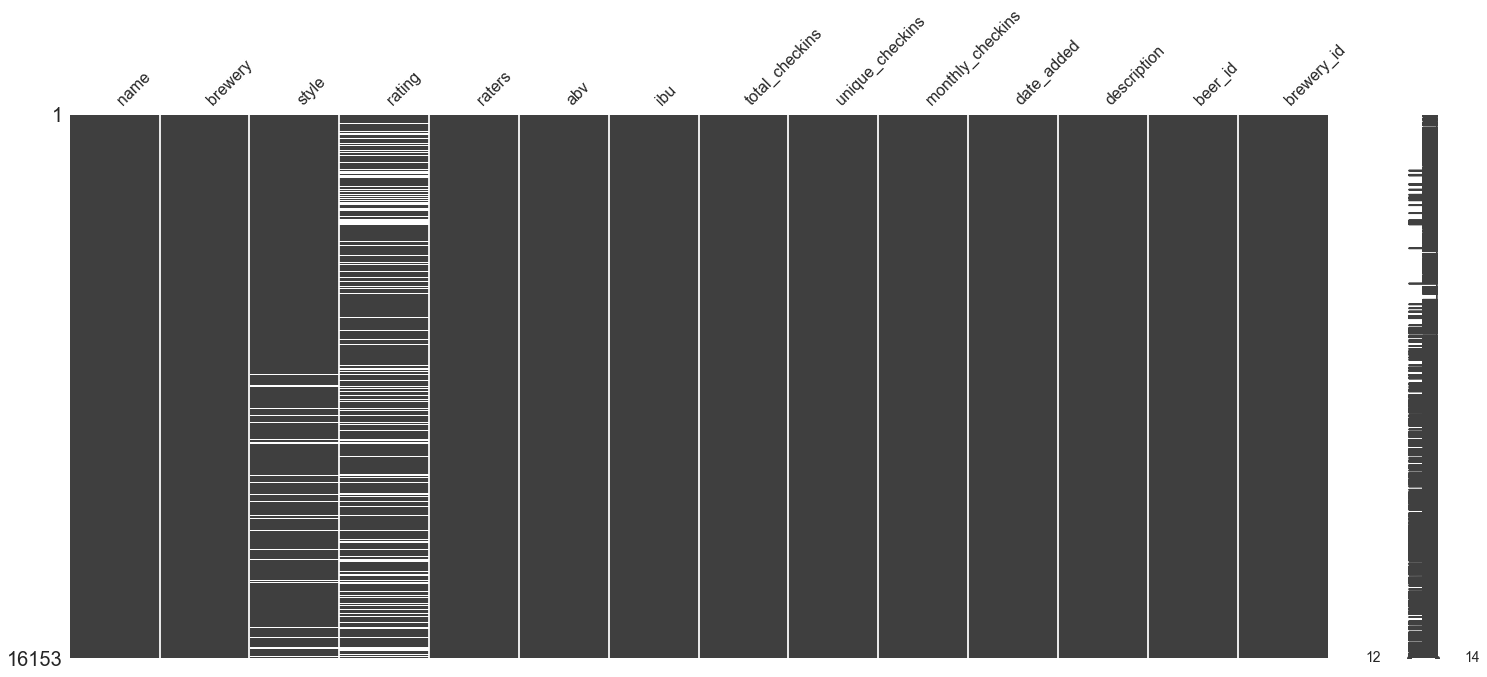

In [39]:
msno.matrix(beers_redux)

In [40]:
beers_redux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16153 entries, 0 to 18610
Data columns (total 14 columns):
name                16153 non-null object
brewery             16153 non-null object
style               15468 non-null object
rating              13018 non-null object
raters              16153 non-null object
abv                 16153 non-null object
ibu                 16153 non-null object
total_checkins      16153 non-null object
unique_checkins     16153 non-null object
monthly_checkins    16153 non-null object
date_added          16153 non-null object
description         16153 non-null object
beer_id             16153 non-null int64
brewery_id          16153 non-null int64
dtypes: int64(2), object(12)
memory usage: 1.8+ MB


## Missing Rating Data

In [41]:
beers_redux['raters'] = beers_redux['raters'].apply(bleach)

In [42]:
beers_redux['raters'].describe()

count     16153.000000
mean       9693.752739
std       30669.782569
min           0.000000
25%          28.000000
50%         642.000000
75%        4894.000000
max      438357.000000
Name: raters, dtype: float64

In [43]:
beers_redux[beers_redux['raters'] < 10].shape

(3135, 14)

According to Untappd's website, a beer must have at least 10 ratings to have a rating displayed. It looks like that explains our missing rating data. 

We can't use this to build our model because we need to train the model on the existing rating, but it could make interesting test data.....

In [45]:
beers_redux = beers_redux[beers_redux['raters'] >= 10].copy()
beers_redux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13018 entries, 0 to 18610
Data columns (total 14 columns):
name                13018 non-null object
brewery             13018 non-null object
style               12951 non-null object
rating              13018 non-null object
raters              13018 non-null float64
abv                 13018 non-null object
ibu                 13018 non-null object
total_checkins      13018 non-null object
unique_checkins     13018 non-null object
monthly_checkins    13018 non-null object
date_added          13018 non-null object
description         13018 non-null object
beer_id             13018 non-null int64
brewery_id          13018 non-null int64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.5+ MB


We are now missing much less style data. I suspect this is because beers with under 10 ratings may well be lower quality entries.

## Style Data

### Missing Data

In [46]:
beers_redux[beers_redux['style'].isnull()]

,name,brewery,style,rating,raters,abv,ibu,total_checkins,unique_checkins,monthly_checkins,date_added,description,beer_id,brewery_id
1032,Pioneer Peak Porter,Great Bear Brewing,NaN,(2.75),12.0,\n 4.3% ABV ...,\n No IBU ...,23,22,0,\n Added 08/21/10 ...,,1097,601
6294,Oatmeal Stout,Cambrian Brewing Co,NaN,(3.66),14.0,\n No ABV ...,\n No IBU ...,28,22,0,\n Added 10/31/10 ...,,7024,1760
6617,Apricot IPA,Homebrew,NaN,(4.02),14.0,\n No ABV ...,\n No IBU ...,27,20,0,\n Added 11/05/10 ...,Dried apricots ad...,7376,1775
6888,Witbeir Homebrew,Homebrew,NaN,(3.99),17.0,\n No ABV ...,\n No IBU ...,42,27,0,\n Added 11/06/10 ...,,7662,1775
7054,Red Ale,Brewer's Best,NaN,(3.52),178.0,\n No ABV ...,\n No IBU ...,415,195,6,\n Added 09/24/11 ...,,81417,6713
7359,Northern Brewer Hefeweizen,Homebrew,NaN,(3.83),30.0,\n No ABV ...,\n No IBU ...,45,36,0,\n Added 11/09/10 ...,Light with a hint...,8159,1775
7550,Czech-Style Pilsner,Homebrew,NaN,(3.58),12.0,\n No ABV ...,\n No IBU ...,39,24,0,\n Added 11/10/10 ...,,8360,1775
7785,GIPA,Homebrew,NaN,(3.7),4449.0,\n 5.58% ABV ...,\n 70 IBU ...,"9,832","5,212",0,\n Added 11/11/10 ...,,8604,1775
8266,Pain in the BIPA,GBGH Brewing,NaN,(3.77),13.0,\n No ABV ...,\n No IBU ...,47,34,0,\n Added 11/13/10 ...,,9104,2533
8751,Caribou Slobber,Homebrew,NaN,(3.7),372.0,\n 6.4% ABV ...,\n No IBU ...,777,444,0,\n Added 11/17/10 ...,My very first brew,9642,1775


In [47]:
beers_redux[beers_redux['style'].isnull()].brewery.value_counts()

Homebrew                           51
Northern Brewer Homebrew Supply     2
Cambrian Brewing Co                 1
Hunter Beer Co                      1
Brewer's Best                       1
Great Fermentations                 1
Barlow Brewing Homebrew             1
GBGH Brewing                        1
Black Heart Brewery                 1
Great Bear Brewing                  1
Walnut Brewery                      1
NathanAles Brewery                  1
Sonoran Brewing Company             1
Ingram Brewing                      1
Black Rock                          1
Midwest Supplies                    1
Name: brewery, dtype: int64

The *vast* majority of missing style data is from homebrews. Much of the style data appears to be present in the name column. I could hard code those styles.... but I'd rather figure out a way to do it programatically.

### Styles

In [54]:
beers_redux['style'].value_counts()

IPA - American                          840
Pale Ale - American                     628
Red Ale - American Amber / Red          490
Lager - Pale                            409
IPA - Imperial / Double                 323
Hefeweizen                              317
Stout - American Imperial / Double      275
Porter - American                       256
Lager - North American Adjunct          251
Brown Ale - American                    250
Witbier                                 228
Winter Ale                              227
Fruit Beer                              221
English Bitter                          219
Pilsner - Other                         200
Barleywine - American                   195
Saison / Farmhouse Ale                  194
Belgian Tripel                          191
Belgian Strong Dark Ale                 180
Blonde Ale                              173
Märzen                                  170
Extra Special / Strong Bitter           167
Stout - Oatmeal                 

In [51]:
beers_redux['style'].value_counts().shape

(155,)

This categorical variable looks super valuable. However, some of the styles have too few examples to be meaningfully used. 

I see a couple different options: 
I could create a set of umbrella categories--> Something as simple as [ale, lager, wild] might be useful or perhaps [mainstream style, uncommon style]
-----> It appers a great many of the categories have parent styles included before the dash
I could also siphon off rarer styles into its own umbrella 


CAN YOU GIVE ME YOUR INSIGHT ON THIS FEATURE, KEVIN??

## BREWERIES

In [57]:
beers_redux.brewery.value_counts()

Mikkeller                                            71
Bell's Brewery                                       66
Stone Brewing                                        64
Anheuser-Busch                                       63
Boston Beer Company                                  60
Rogue Ales & Spirits                                 57
Rock Bottom Restaurant & Brewery                     56
Dogfish Head Craft Brewery                           52
Homebrew                                             51
Sierra Nevada Brewing Co.                            50
Victory Brewing Company                              47
The Matt Brewing Company (Saranac)                   46
Short's Brewing Company                              46
Goose Island Beer Co.                                45
New Glarus Brewing Company                           43
Midnight Sun Brewing Co.                             43
Nøgne Ø                                              42
Great Divide Brewing Company                    

In [60]:
beers_redux.brewery.value_counts().shape

(2517,)

In [63]:
beers_redux.brewery.value_counts()[beers_redux.brewery.value_counts() == 1].shape

(801,)

*A LOT* of one-offs. This is part of why incorporating info from the brewery table will be so valuable.

## Beer IDs
I'm interested in checking this out to see how high the number goes, b/c I am scraping based on this number.

In [64]:
beers_redux.beer_id.describe()

count    1.301800e+04
mean     3.821897e+04
std      1.373904e+05
min      1.000000e+00
25%      5.724000e+03
50%      1.107950e+04
75%      1.749975e+04
max      1.928453e+06
Name: beer_id, dtype: float64

In [66]:
beers_redux.beer_id.sort_values(ascending=False)

3594     1928453
13761    1849960
11418    1845238
12774    1843260
11008    1840728
2900     1811069
14932    1794727
13723    1788928
16712    1713109
7586     1706475
15225    1684182
4041     1671767
3493     1652916
9681     1636521
4660     1629024
13448    1604796
15820    1602511
1434     1581410
2555     1550626
12487    1540111
18141    1510757
7987     1497044
4505     1497044
16838    1497044
9700     1476282
18174    1466997
15616    1463269
10006    1439807
10898    1435814
10101    1429332
10183    1416748
795      1410336
5077     1405789
4504     1387947
7822     1387854
9036     1382065
16520    1363064
2568     1349568
16495    1343766
14084    1338024
8514     1335116
7849     1327361
8193     1324776
5954     1319988
12136    1315856
4180     1312828
14807    1311963
6622     1308003
3045     1283448
8258     1282484
13962    1275927
1216     1253431
1214     1249723
6541     1235717
3023     1229273
13055    1204979
11958    1199578
1279     1185728
708      11831

Frighteningly, the highest IDs are close to 2,000,000. I've scraped up to about 70,000 now. I guess the question is do I need to get everything? At what point have I gleaned a sufficient amount of data? Also, since the lower numbers are redirecting to the higher numbers, at what point am I likely to have hit the big numbers anyhow?

## Rating

In [67]:
beers_redux['rating'] = beers_redux['rating'].apply(bleach)

In [68]:
beers_redux['rating'].describe()

count    13018.000000
mean         3.481314
std          0.370268
min          1.100000
25%          3.320000
50%          3.510000
75%          3.690000
max          4.800000
Name: rating, dtype: float64

(array([  2.00000000e+00,   3.00000000e+00,   1.20000000e+01,
          1.50000000e+01,   3.60000000e+01,   4.40000000e+01,
          8.20000000e+01,   1.33000000e+02,   2.19000000e+02,
          3.87000000e+02,   7.24000000e+02,   1.59100000e+03,
          3.16200000e+03,   3.21600000e+03,   2.07900000e+03,
          7.61000000e+02,   3.28000000e+02,   1.52000000e+02,
          6.50000000e+01,   7.00000000e+00]),
 array([ 1.1  ,  1.285,  1.47 ,  1.655,  1.84 ,  2.025,  2.21 ,  2.395,
         2.58 ,  2.765,  2.95 ,  3.135,  3.32 ,  3.505,  3.69 ,  3.875,
         4.06 ,  4.245,  4.43 ,  4.615,  4.8  ]),
 <a list of 20 Patch objects>)

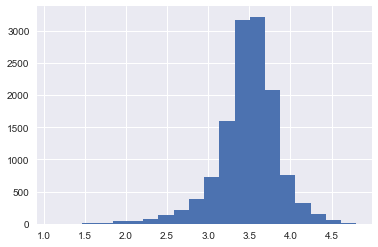

In [73]:
plt.hist(beers_redux['rating'], bins = 20)

Fairly normally distributed, but skewed to the left. Centered around 3.5.

## ABV

In [74]:
beers_redux['abv'] = beers_redux['abv'].apply(bleach)

In [75]:
beers_redux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13018 entries, 0 to 18610
Data columns (total 14 columns):
name                13018 non-null object
brewery             13018 non-null object
style               12951 non-null object
rating              13018 non-null float64
raters              13018 non-null float64
abv                 12216 non-null float64
ibu                 13018 non-null object
total_checkins      13018 non-null object
unique_checkins     13018 non-null object
monthly_checkins    13018 non-null object
date_added          13018 non-null object
description         13018 non-null object
beer_id             13018 non-null int64
brewery_id          13018 non-null int64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.5+ MB


As I expected, some of the ABV data is missing now that it has been cleaned (about 6% on this run). For this and IBU, imputing the median might be a reasonable move. Alternatively, we might impute the median for these values for the particular style of beer? Probably would have a greater influence on IBU than ABV. That said, if the median abv is 5.0 and we impute that for a Triple IPA, it would skew that data point pretty hard....

For the sake of checking out the distribution, I'm just gonna do the median for the time being.

In [87]:
beers_redux['abv'].describe()

SystemError: <built-in method format of str object at 0x113938920> returned a result with an error set

In [84]:
beers_redux['abv'].fillna(beers_redux['abv'].median, inplace=True)

TypeError: '<=' not supported between instances of 'float' and 'method'

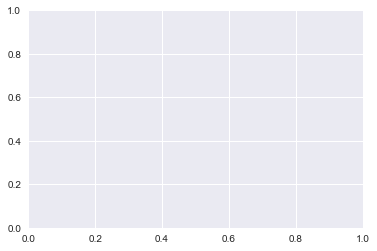

In [86]:
plt.hist(beers_redux['abv'].values)